In [34]:
from PIL import Image
from numpy import asarray
from numpy import save
from numpy import load
from numpy import savez_compressed

from matplotlib import image
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import random
plt.style.use('default')


In [35]:
def Squre_Reshape(filename, size =256):
    ''' 
    Image is reshaped, all the images are reshaped to 256 * 256
    '''
    
    image = Image.open(filename)
    #print('Image size:',image.size)

    new_image = image.resize((size, size))
    #new_image.save('test_image.jpg')
    
    return new_image


def JPGtoArrary(image):
    '''
    convert jpg file image to numpy array. if there is only one channel, set all the 3 channels to be idential
    '''

    data = asarray(image)
    #print('Data type:',type(data))
    # summarize shape
    #print('Data shape:',data.shape)
    
    if len(data.shape) == 3:  #  3 channels
        return data
    
    elif len(data.shape) == 2:  # black & white one channel
        stacked_data = np.stack((data,)*3, axis=-1)
        print('Data is expaned, current shape:', stacked_data.shape)  # Notice when processing black white image
        return stacked_data 
    
    else:
        print('Wrong Image Format!')
        

## Check Square_Reshape with Images

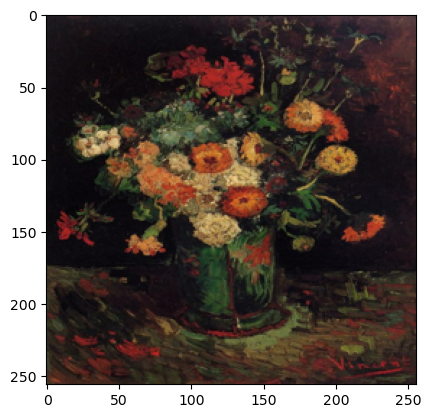

In [36]:
direct = '/home/ubuntu/Project/images/images/'
artist = 'Vincent_van_Gogh/'
filename_1 = 'Vincent_van_Gogh_101.jpg'

reshaped_image = Squre_Reshape(direct+artist+filename_1, 256)
plt.imshow(reshaped_image)

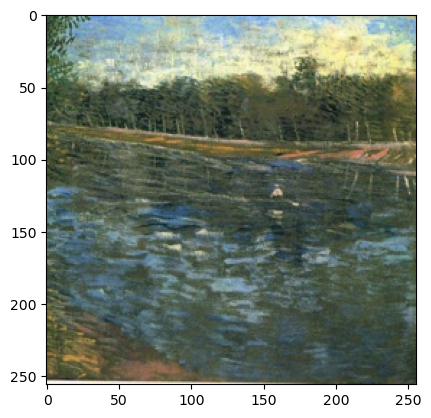

In [37]:
filename_2 = 'Vincent_van_Gogh_102.jpg'
reshaped_image = Squre_Reshape(direct+artist+filename_2)

plt.imshow(reshaped_image)

## Check JPG to Arrary for regular jpgs (three channels)

original data shape: (1024, 720, 3)


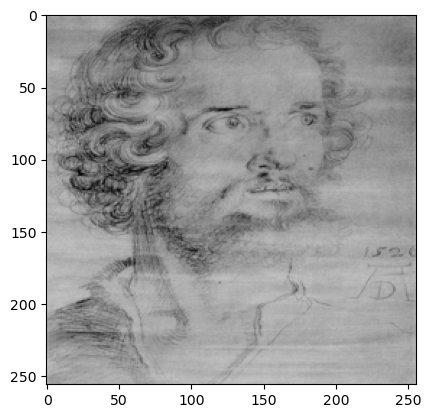

In [38]:
direct = '/home/ubuntu/Project/images/images/'
artist = 'Albrecht_DuтХа├кrer/'
filename = 'Albrecht_DuтХа├кrer_1.jpg'

image = Image.open(direct+artist+filename)

data = asarray(image)
print('original data shape:',data.shape)

reshaped_image = Squre_Reshape(direct+artist+filename)
#plt.imshow(cropped_image)

np_data = JPGtoArrary(reshaped_image)

plt.imshow(np_data)

## CSV file - Overview of  Artists & Paintings

In [39]:
df = pd.read_csv('artists.csv')
art_data = df[['id', 'name', 'years', 'genre', 'nationality', 'paintings']]
art_data.set_index('id',inplace = True)
art_data

,name,years,genre,nationality,paintings
id,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
3,Claude Monet,1840 - 1926,Impressionism,French,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194
5,Salvador Dali,1904 - 1989,Surrealism,Spanish,139
6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,90
7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,99
8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,877


In [40]:
##  Albrecht_Dürer is shown as Albrecht_Du╠Иrer in ec2 instance 

## run this if in the ec2 

art_data.iloc[19,0] = "Albrecht Du╠Иrer"
art_data

/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,name,years,genre,nationality,paintings
id,,,,,
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,193
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,88
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,70
3,Claude Monet,1840 - 1926,Impressionism,French,73
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,194
5,Salvador Dali,1904 - 1989,Surrealism,Spanish,139
6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,90
7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,99
8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,877


In [41]:
len(art_data)

for i in range(len(art_data)):
    train_label = art_data.index[i]
    artist = art_data.iloc[i,0]
    paint_num = art_data.iloc[i,4]
    print(train_label, artist, paint_num)

0 Amedeo Modigliani 193
1 Vasiliy Kandinskiy 88
2 Diego Rivera 70
3 Claude Monet 73
4 Rene Magritte 194
5 Salvador Dali 139
6 Edouard Manet 90
7 Andrei Rublev 99
8 Vincent van Gogh 877
9 Gustav Klimt 117
10 Hieronymus Bosch 137
11 Kazimir Malevich 126
12 Mikhail Vrubel 171
13 Pablo Picasso 439
14 Peter Paul Rubens 141
15 Pierre-Auguste Renoir 336
16 Francisco Goya 291
17 Frida Kahlo 120
18 El Greco 87
19 Albrecht Du╠Иrer 328
20 Alfred Sisley 259
21 Pieter Bruegel 134
22 Marc Chagall 239
23 Giotto di Bondone 119
24 Sandro Botticelli 164
25 Caravaggio 55
26 Leonardo da Vinci 143
27 Diego Velazquez 128
28 Henri Matisse 186
29 Jan van Eyck 81
30 Edgar Degas 702
31 Rembrandt 262
32 Titian 255
33 Henri de Toulouse-Lautrec 81
34 Gustave Courbet 59
35 Camille Pissarro 91
36 William Turner 66
37 Edvard Munch 67
38 Paul Cezanne 47
39 Eugene Delacroix 31
40 Henri Rousseau 70
41 Georges Seurat 43
42 Paul Klee 188
43 Piet Mondrian 84
44 Joan Miro 102
45 Andy Warhol 181
46 Paul Gauguin 311
47 Raphae

## Creat of train_data, train_labels

In [42]:
# train_data (256,256,3, 8XXX)
# train_label (1, 8XXX)

direct = '/home/ubuntu/Project/images/images/'  # local directory for archive/images/images

train_data = []
train_labels = []

size = 256 # crop suqare size, default 256


for i in range(len(art_data)):  # for index id 0 -49 in csv  range(len(art_data))
    
    train_label = art_data.index[i]  # train_label = 3
    artist = art_data.iloc[i,0]  # artist = 'Claude Monet'
    paint_num = art_data.iloc[i,4]  # paint_num = 73
    
    print("Artist ID: {}, Artist Name: {}, Paintings Nubmer: {}.".format(train_label, artist, paint_num))
    
    artist = '_'.join(artist.split())  # folder for artist: 'Claude_Monet'
    
    for j in range(1, paint_num+1):  # for painting number 1 - paint_num
        
        filename = artist + "_" + str(j) + '.jpg'  #filename = 'Vincent_van_Gogh_100.jpg'
        image_array = JPGtoArrary(Squre_Reshape(direct + artist + '/' + filename, size))  # reshaped_image to array
        train_data.append(image_array)   # train_data +=
        train_labels.append(train_label)
        

train_data = np.array(train_data)
train_labels = np.array(train_labels)

print(train_data.shape)
print(train_labels.shape)



Artist ID: 0, Artist Name: Amedeo Modigliani, Paintings Nubmer: 193.
Artist ID: 1, Artist Name: Vasiliy Kandinskiy, Paintings Nubmer: 88.
Artist ID: 2, Artist Name: Diego Rivera, Paintings Nubmer: 70.
Artist ID: 3, Artist Name: Claude Monet, Paintings Nubmer: 73.
Artist ID: 4, Artist Name: Rene Magritte, Paintings Nubmer: 194.
Artist ID: 5, Artist Name: Salvador Dali, Paintings Nubmer: 139.
Artist ID: 6, Artist Name: Edouard Manet, Paintings Nubmer: 90.
Artist ID: 7, Artist Name: Andrei Rublev, Paintings Nubmer: 99.
Artist ID: 8, Artist Name: Vincent van Gogh, Paintings Nubmer: 877.
Artist ID: 9, Artist Name: Gustav Klimt, Paintings Nubmer: 117.
Artist ID: 10, Artist Name: Hieronymus Bosch, Paintings Nubmer: 137.
Artist ID: 11, Artist Name: Kazimir Malevich, Paintings Nubmer: 126.
Artist ID: 12, Artist Name: Mikhail Vrubel, Paintings Nubmer: 171.
Artist ID: 13, Artist Name: Pablo Picasso, Paintings Nubmer: 439.
Data is expaned, current shape: (256, 256, 3)
Data is expaned, current shap

## Save train_data, train_labels to npy & npz

In [43]:
# save to npy file
save('train_data_reshape.npy', train_data)
save('train_labels_reshape.npy', train_labels)

In [44]:
# save to npz file
savez_compressed('train_data_reshape.npz', train_data)
savez_compressed('train_labels_reshape.npz', train_labels)

## Check Random Image Array from train_data

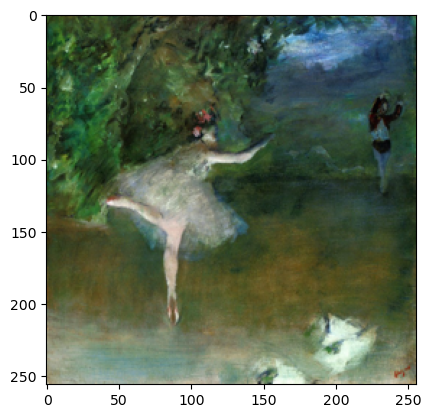

In [45]:
i = random.randint(0, len(train_data))

img = Image.fromarray(train_data[i],'RGB')

#img.show()

plt.imshow(img)


## Check Random Image Array from train_data.npy

(8446, 256, 256, 3)
<class 'numpy.ndarray'>


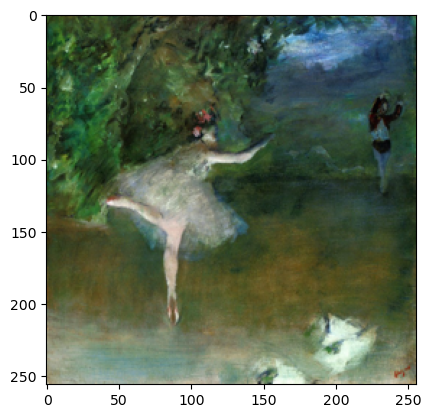

In [50]:
load_data = load('train_data_reshape.npy')

print(load_data.shape)
print(type(load_data))

img = Image.fromarray(load_data[i],'RGB')

#img.show()

plt.imshow(img)

In [47]:
!pwd

/home/ubuntu/Project


In [48]:
# !unzip images.zip
!ls

Final_Project.ipynb	  images		  train_data_reshape.npz
Sampling_Cropping.ipynb   images.zip		  train_labels.npy
Sampling_Reshaping.ipynb  train_data.npy	  train_labels_arg4.npy
Untitled.ipynb		  train_data_arg4.npy	  train_labels_reshape.npy
artists.csv		  train_data_reshape.npy  train_labels_reshape.npz


In [49]:
# !unzip images.zip